In [1]:
import pandas as pd

df = pd.read_csv(r"IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
df.shape

(50000, 2)

In [3]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
review       0
sentiment    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

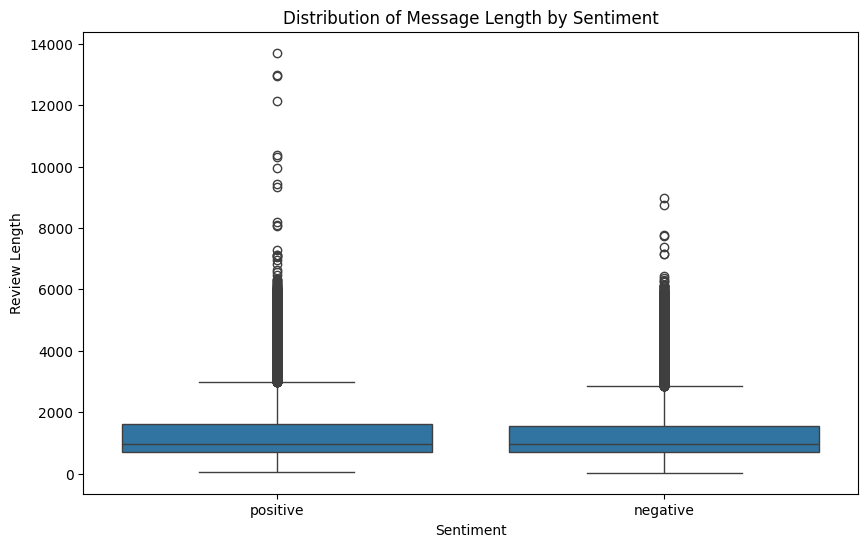

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df['review_length'] = df['review'].apply(len)

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'sentiment', y = 'review_length')
plt.title('Distribution of Message Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

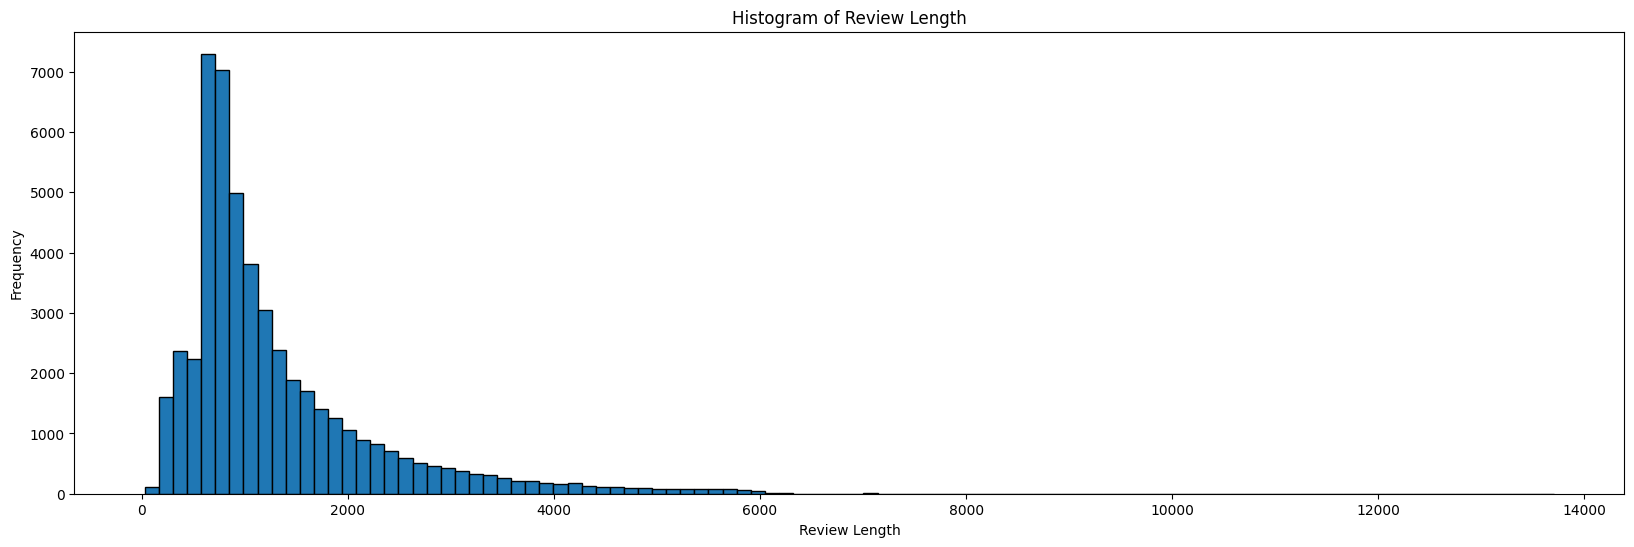

In [8]:
plt.figure(figsize = (20, 6))
plt.hist(df['review_length'], bins = 100, edgecolor = 'black')
plt.title('Histogram of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [9]:
df.duplicated().sum()

np.int64(418)

In [10]:
df.drop_duplicates(subset = ['review'], inplace = True)
df.duplicated().sum()

np.int64(0)

In [11]:
import neattext.functions as nfx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

df['clean_review'] = df['review'].apply(nfx.remove_userhandles)
df['clean_review'] = df['clean_review'].apply(nfx.remove_html_tags)
df['clean_review'] = df['clean_review'].apply(nfx.remove_hashtags)
df['clean_review'] = df['clean_review'].apply(nfx.remove_emojis)
df['clean_review'] = df['clean_review'].apply(nfx.remove_stopwords)
df['clean_review'] = df['clean_review'].apply(nfx.remove_special_characters)
df['clean_review'] = df['clean_review'].apply(lemmatize_text)
df


[nltk_data] Downloading package punkt to /Users/juweriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juweriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juweriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,reviewer mentioned watching 1 Oz episode hooke...
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,748,Basically there family little boy Jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,Petter Matteis Love Time Money visually stunni...
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,Bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,1280,Catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,1234,Im going disagree previous comment Maltin one ...


In [137]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['clean_review'])
y = np.where(df['sentiment'] == 'positive', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (39665, 1000)
X_test shape: (9917, 1000)
y_train shape: (39665,)
y_test shape: (9917,)


In [138]:
from logistic_regression import LogisticRegression

regressor = LogisticRegression(learning_rate=0.001, number_of_iterations=1000)
regressor.fit(X_train, y_train)

In [139]:
predictions = regressor.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average = 'weighted')
recall = recall_score(y_test, predictions, average = 'weighted')
f1 = f1_score(y_test, predictions, average = 'weighted')
cm = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')

print(classification_report(y_test, predictions))

Accuracy: 72.03%
Precision: 78.08%
Recall: 72.03%
F1 Score: 70.40%
              precision    recall  f1-score   support

           0       0.91      0.49      0.63      4939
           1       0.65      0.95      0.77      4978

    accuracy                           0.72      9917
   macro avg       0.78      0.72      0.70      9917
weighted avg       0.78      0.72      0.70      9917



In [141]:
test1 = "The movie was great. I had an enjoyable time with my friends watching it :)"
test1_transformed = vectorizer.transform([test1])
test1_prediction = regressor.predict(test1_transformed)
test1_sentiment = "positive" if test1_prediction[0] == 1 else "negative"
print(f"Prediction for test1: {test1_sentiment}")

Prediction for test1: positive


In [142]:
test2 = "Bad"
test2_transformed = vectorizer.transform([test2])
test2_prediction = regressor.predict(test2_transformed)
test2_sentiment = "positive" if test2_prediction[0] == 1 else "negative"
print(f"Prediction for test2: {test2_sentiment}")

Prediction for test2: negative
